In [1]:
%%file polybas.m
function T = polybas(kmin,kmax,Np,kgrid)

    % Np: 多項式の次数-1
    % Ng: グリッドの数
    Ng = size(kgrid,1);
    x = (2/(kmax-kmin))*(kgrid-kmin) - 1;
    
    % 基底関数の行列(NgxNp)を再帰的に求める
    T = zeros(Ng,Np);
    T0 = ones(Ng,1);
    T1 = x;
    T2 = 2*x.*T1 - T0;
    T(:,1) = T1;
    T(:,2) = T2;
    
    for i=3:Np-1
        T(:,i) = 2*x.*T(:,i-1) - T(:,i-2);
    end
    
    T = [T0 T(:,1:(Np-1))];

Created file '/home/takeki/Documents/keizai-seminar/chapter4/Matlab/2_Chebyshev_polynomials/polybas.m'.


In [19]:
%%file polygrid.m
function k = polygrid(kmin,kmax,N)

    temp = linspace(0,N-1,N)'; %[0:N-1:1]'; % チェビシェフ極値点
    x = -cos((pi/(N-1))*temp);
%     temp = linspace(0,N-1,N)'; %[0:N-1:1]'; % チェビシェフゼロ点
%     x = [0; -cos((pi/2/(N-1))*(2*temp - 1))];
    
    % xからkに変換
    k = 0.5*(kmax-kmin)*(x+1) + kmin;

Created file '/home/takeki/Documents/keizai-seminar/chapter4/Matlab/2_Chebyshev_polynomials/polygrid.m'.


In [3]:
%%file f.m
function f0 = f(x0)

    nx = size(x0,1);
    f0 = ones(nx,1)./(ones(nx,1)+25*x0.^2);

Created file '/home/takeki/Documents/keizai-seminar/chapter4/Matlab/2_Chebyshev_polynomials/f.m'.


In [4]:
%% データ点
xmin = -1;
xmax = 1;
nxd = 11;
xd = linspace(xmin, xmax, nxd)'; %collect(LinRange(xmin, xmax, nxd))
yd = f(xd);

%% 関数による値
nx = 1001;
x0 = linspace(xmin, xmax, nx)'; %collect(LinRange(xmin, xmax, nx))
y0 = f(x0);

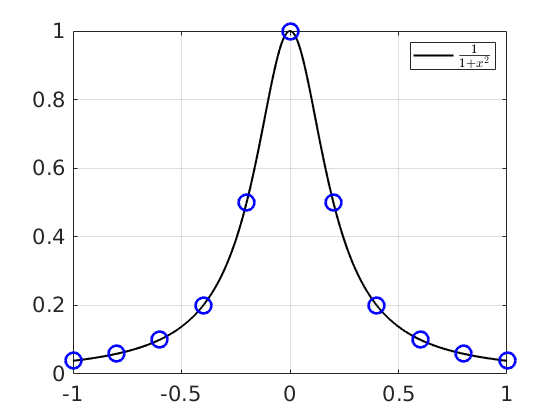

In [5]:
plot(x0,y0,'k-','LineWidth',1.5);
hold on;
plot(xd,yd,'bo','MarkerSize',12,'LineWidth',2.0);
grid on;
legend({'$\frac{1}{1+x^2}$'},'Interpreter','latex');
set(gca,'Fontsize',16);
%saveas (gcf,'Fig_data.eps','epsc2');

In [6]:
%% Matlab関数(interp1)を使った線形補間による近似
x1 = linspace(xmin, xmax, nx)';
y1 = interp1(xd,yd,x1,'linear','extrap');

In [7]:
%% 通常の多項式による近似
Xd = ones(nxd,nxd);
X2 = ones(nx,nxd);
x2 = x1;
for i = 1:nxd-1
    Xd(:,i+1) = xd.^i;
    X2(:,i+1) = x2.^i;
end

b = (Xd'*Xd)\(Xd'*yd);
y2 = X2*b;

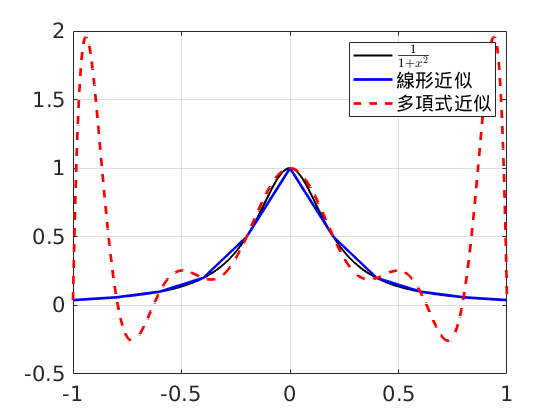

In [8]:
plot(x0,y0,'k-','LineWidth',1.5);
hold on;
plot(x1,y1,'-','Color','blue','LineWidth',2.0);
plot(x2,y2,'--','Color','red','LineWidth',2.0);
legend({'$\frac{1}{1+x^2}$','線形近似','多項式近似'},'Interpreter','latex');
grid on;
set(gca,'Fontsize',16);
%saveas(gcf,'Fig_interp.eps','epsc2');

In [14]:
%% チェビシェフ多項式による近似
% N=11
nxd = 11;
xcheb = polygrid(xmin,xmax,nxd);
ycheb = f(xcheb); %#ones(nxd)./(ones(nxd)+25*xcheb.^2)
T = polybas(xmin,xmax,nxd,xcheb);
theta = T\ycheb;

x3 = x1;
T3 = polybas(xmin,xmax,nxd,x3);
y3 = T3*theta;


x =

         0
   -0.9877
   -0.9877
   -0.8910
   -0.7071
   -0.4540
   -0.1564
    0.1564
    0.4540
    0.7071
    0.8910
    0.9877



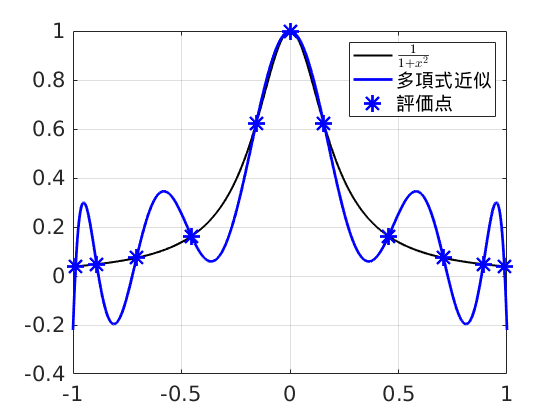

In [16]:
plot(x0,y0,'k-','LineWidth',1.5);
hold on;
plot(x3,y3,'-','Color','blue','LineWidth',2.0);
plot(xcheb,ycheb,'*','Color','blue','MarkerSize',12,'LineWidth',2.0);
legend({'$\frac{1}{1+x^2}$','多項式近似','評価点'},'Interpreter','latex'); %,'Location','NorthEast');
grid on;
set(gca,'FontSize',16);

In [17]:
% チェビシェフ多項式による近似
% N=21
nxd = 21;
xcheb = polygrid(xmin,xmax,nxd);
ycheb = f(xcheb); %#ones(nxd)./(ones(nxd)+25*xcheb.^2)
T = polybas(xmin,xmax,nxd,xcheb);
theta = T\ycheb;

x3 = x1;
T3 = polybas(xmin,xmax,nxd,x3);
y3 = T3*theta;

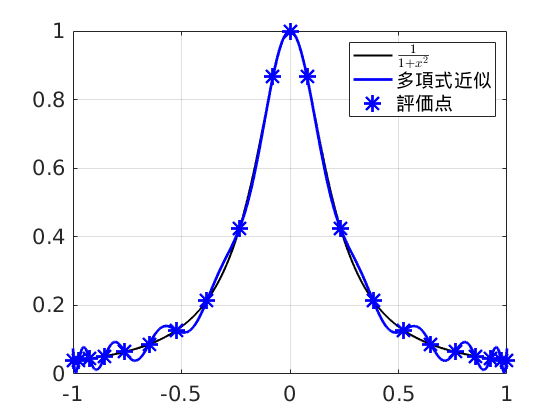

In [18]:
plot(x0,y0,'k-','LineWidth',1.5);
hold on;
plot(x3,y3,'-','Color','blue','LineWidth',2.0);
plot(xcheb,ycheb,'*','Color','blue','MarkerSize',12,'LineWidth',2.0);
legend({'$\frac{1}{1+x^2}$','多項式近似','評価点'},'Interpreter','latex'); %,'Location','NorthEast');
grid on;
set(gca,'FontSize',16);